# Notebook 1: NASA C-MAPSS Turbofan Data Exploration

**Course**: M2 SID - Processus Data  
**Instructor**: Feda Almuhisen  
**Institution**: Aix-Marseille University  
**Year**: 2025-2026

---

## Objectives

In this notebook, you will:
1. Load and explore the NASA C-MAPSS turbofan dataset
2. Understand the data structure and features
3. Visualize sensor readings and degradation patterns
4. Analyze RUL (Remaining Useful Life) distribution
5. Identify which sensors are most informative

---

In [1]:
# Import libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Import project modules
from data.download_data import TurbofanDataDownloader

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Raw Data

Let's load the NASA C-MAPSS dataset. This contains sensor readings from turbofan engines running until failure.

In [2]:
# Initialize downloader
downloader = TurbofanDataDownloader(data_dir='../data')

# Load FD001 dataset (simplest variant)
train_df, test_df, rul_df = downloader.load_dataset('FD001')

print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")
print(f"RUL values: {rul_df.shape}")

2025-11-12 13:13:10,040 - INFO - Initialized downloader. Data directory: c:\Users\samim\Documents\code\PD\TP_12_11\notebooks\..\data\raw
2025-11-12 13:13:10,042 - INFO - 
Loading FD001 dataset...
2025-11-12 13:13:10,044 - INFO - Loading train_FD001.txt...
2025-11-12 13:13:10,351 - INFO -  Loaded 20,631 samples
2025-11-12 13:13:10,351 - INFO - Loading test_FD001.txt...
2025-11-12 13:13:10,531 - INFO -  Loaded 13,096 samples
2025-11-12 13:13:10,531 - INFO - Loading RUL_FD001.txt...
2025-11-12 13:13:10,546 - INFO -  Loaded RUL for 100 engines


Training set: (20631, 26)
Test set: (13096, 26)
RUL values: (100, 2)


## 2. Dataset Overview

In [3]:
# Display first few rows
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# Dataset information
print("Dataset Info:")
print(f"Total samples: {len(train_df):,}")
print(f"Number of engines: {train_df['engine_id'].nunique()}")
print(f"Number of sensors: {len([c for c in train_df.columns if c.startswith('sensor_')])}")
print(f"Number of settings: {len([c for c in train_df.columns if c.startswith('setting_')])}")
print(f"\nColumns: {train_df.columns.tolist()}")

Dataset Info:
Total samples: 20,631
Number of engines: 100
Number of sensors: 21
Number of settings: 3

Columns: ['engine_id', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [5]:
# Missing values check
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print("No missing values in the dataset!")
else:
    print("Missing values:")
    print(missing[missing > 0])

No missing values in the dataset!


## 3. Calculate and Add RUL

RUL (Remaining Useful Life) = Number of cycles remaining until engine failure

In [6]:
# Calculate RUL for training data
from data.preprocessing import TurbofanPreprocessor

preprocessor = TurbofanPreprocessor()
train_df = preprocessor.add_rul(train_df)
test_df = preprocessor.add_rul_from_test(test_df, rul_df)

print("RUL calculated")
print(f"RUL range (train): {train_df['RUL'].min()} to {train_df['RUL'].max()}")
print(f"RUL range (test): {test_df['RUL'].min()} to {test_df['RUL'].max()}")

2025-11-12 13:13:11,198 - INFO - Initialized TurbofanPreprocessor with standard scaler
2025-11-12 13:13:11,198 - INFO - Calculating RUL (Remaining Useful Life)...
2025-11-12 13:13:11,223 - INFO -  RUL calculated. Range: 0 to 361
2025-11-12 13:13:11,223 - INFO - Adding RUL to test set...
2025-11-12 13:13:11,238 - INFO -  Test RUL calculated. Range: 7 to 340


RUL calculated
RUL range (train): 0 to 361
RUL range (test): 7 to 340


## 4. RUL Distribution Analysis

In [7]:
# RUL statistics
print("RUL Statistics (Training Set):")
print(train_df['RUL'].describe())

RUL Statistics (Training Set):
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64


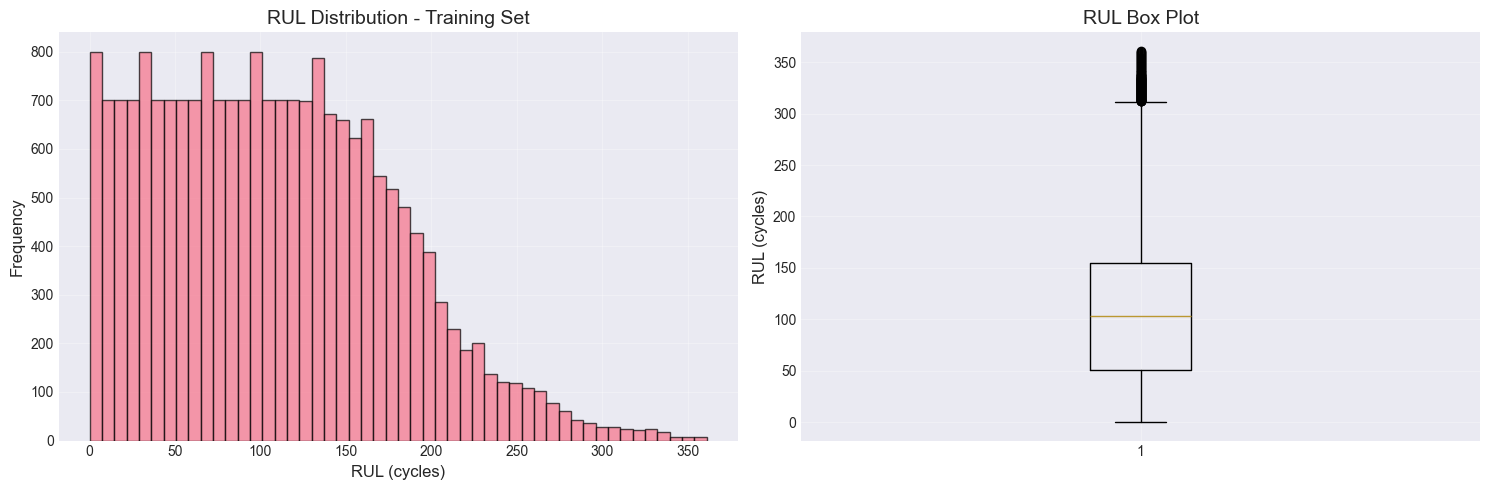


Insight: Most engines have RUL between 0-200 cycles
Some engines run for 300+ cycles before failure


In [8]:
# Plot RUL distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train_df['RUL'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('RUL (cycles)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('RUL Distribution - Training Set', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(train_df['RUL'], vert=True)
axes[1].set_ylabel('RUL (cycles)', fontsize=12)
axes[1].set_title('RUL Box Plot', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nInsight: Most engines have RUL between 0-200 cycles")
print(f"Some engines run for 300+ cycles before failure")

### Analysis: RUL Distribution

**What we observe:**
- The histogram shows the distribution is relatively uniform across 0-200 cycles
- There's a long tail extending to 350+ cycles
- Most engines (75%) have RUL less than 155 cycles

**Why this matters:**
- **For anomaly detection**: We can define 'critical' engines as RUL < 30 cycles
- **For training**: We'll use engines with RUL > 100 as 'healthy' examples
- **Class balance**: We need to be careful about imbalanced data when training

**Technical note:**
- The box plot shows median around 103 cycles
- Few outliers (whiskers extend to min/max)
- This suggests relatively consistent engine behavior

## 5. Engine Lifecycle Analysis

Engine Lifecycle Statistics:
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64


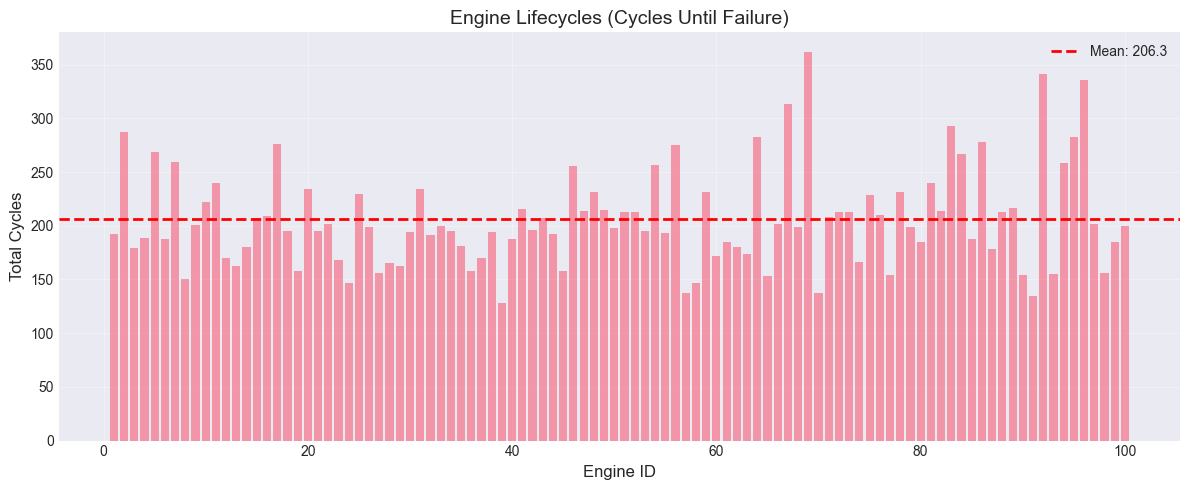


Insight: Engines fail between 128 and 362 cycles
Average lifetime: 206.3 cycles


In [9]:
# Analyze engine lifecycles
engine_cycles = train_df.groupby('engine_id')['cycle'].max()

print("Engine Lifecycle Statistics:")
print(engine_cycles.describe())

# Plot
plt.figure(figsize=(12, 5))
plt.bar(engine_cycles.index, engine_cycles.values, alpha=0.7)
plt.axhline(engine_cycles.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {engine_cycles.mean():.1f}')
plt.xlabel('Engine ID', fontsize=12)
plt.ylabel('Total Cycles', fontsize=12)
plt.title('Engine Lifecycles (Cycles Until Failure)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nInsight: Engines fail between {engine_cycles.min()} and {engine_cycles.max()} cycles")
print(f"Average lifetime: {engine_cycles.mean():.1f} cycles")

### Analysis: Engine Lifecycles

**What we observe:**
- Engine lifespans vary significantly: 128 to 362 cycles
- Mean lifetime: ~206 cycles (red dashed line)
- Standard deviation: ~65 cycles (high variability)

**Why this matters:**
- **Variability is realistic**: Real engines don't fail at exactly the same time
- **For modeling**: This variability makes prediction challenging but valuable
- **For validation**: We need to test on engines with different lifespans

**Key insight:**
- Some engines fail 2x earlier than others
- This suggests different operating conditions or manufacturing variations
- Our autoencoder must learn to detect anomalies despite this natural variation

## 6. Sensor Analysis

In [10]:
# Get sensor columns
sensor_cols = [c for c in train_df.columns if c.startswith('sensor_')]
print(f"Total sensors: {len(sensor_cols)}")
print(f"Sensor columns: {sensor_cols}")

Total sensors: 21
Sensor columns: ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [11]:
# Sensor statistics
print("Sensor Statistics (Training Set):")
train_df[sensor_cols].describe().T

Sensor Statistics (Training Set):


,count,mean,std,min,25%,50%,75%,max
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [12]:
# Check for constant sensors (zero variance)
sensor_variance = train_df[sensor_cols].var()
constant_sensors = sensor_variance[sensor_variance == 0].index.tolist()

if constant_sensors:
    print(f"WARNING: Constant sensors (zero variance): {constant_sensors}")
    print("These sensors provide no information and should be removed")
else:
    print("No constant sensors found - all sensors vary over time")

These sensors provide no information and should be removed


### Analysis: Constant Sensors

**Sensors with zero variance (constant values):**
- sensor_1, sensor_10, sensor_18, sensor_19

**Why remove them:**
1. **No information gain**: They don't change, so can't indicate degradation
2. **Computational waste**: Including them adds dimensions without benefit
3. **Model confusion**: ML models might try to learn patterns from noise

**Preprocessing action:**
```python
# These sensors will be dropped during preprocessing
sensors_to_remove = ['sensor_1', 'sensor_10', 'sensor_18', 'sensor_19']
```

**Result**: We go from 21 sensors to 17 informative sensors

## 7. Engine Degradation Patterns

Let's visualize how sensors change as an engine degrades (approaches failure).

In [13]:
# Select one engine to analyze
engine_id = 1
engine_data = train_df[train_df['engine_id'] == engine_id].copy()
engine_data = engine_data.sort_values('cycle')

print(f"Engine {engine_id}:")
print(f"  Total cycles: {engine_data['cycle'].max()}")
print(f"  Sensors tracked: {len(sensor_cols)}")

Engine 1:
  Total cycles: 192
  Sensors tracked: 21


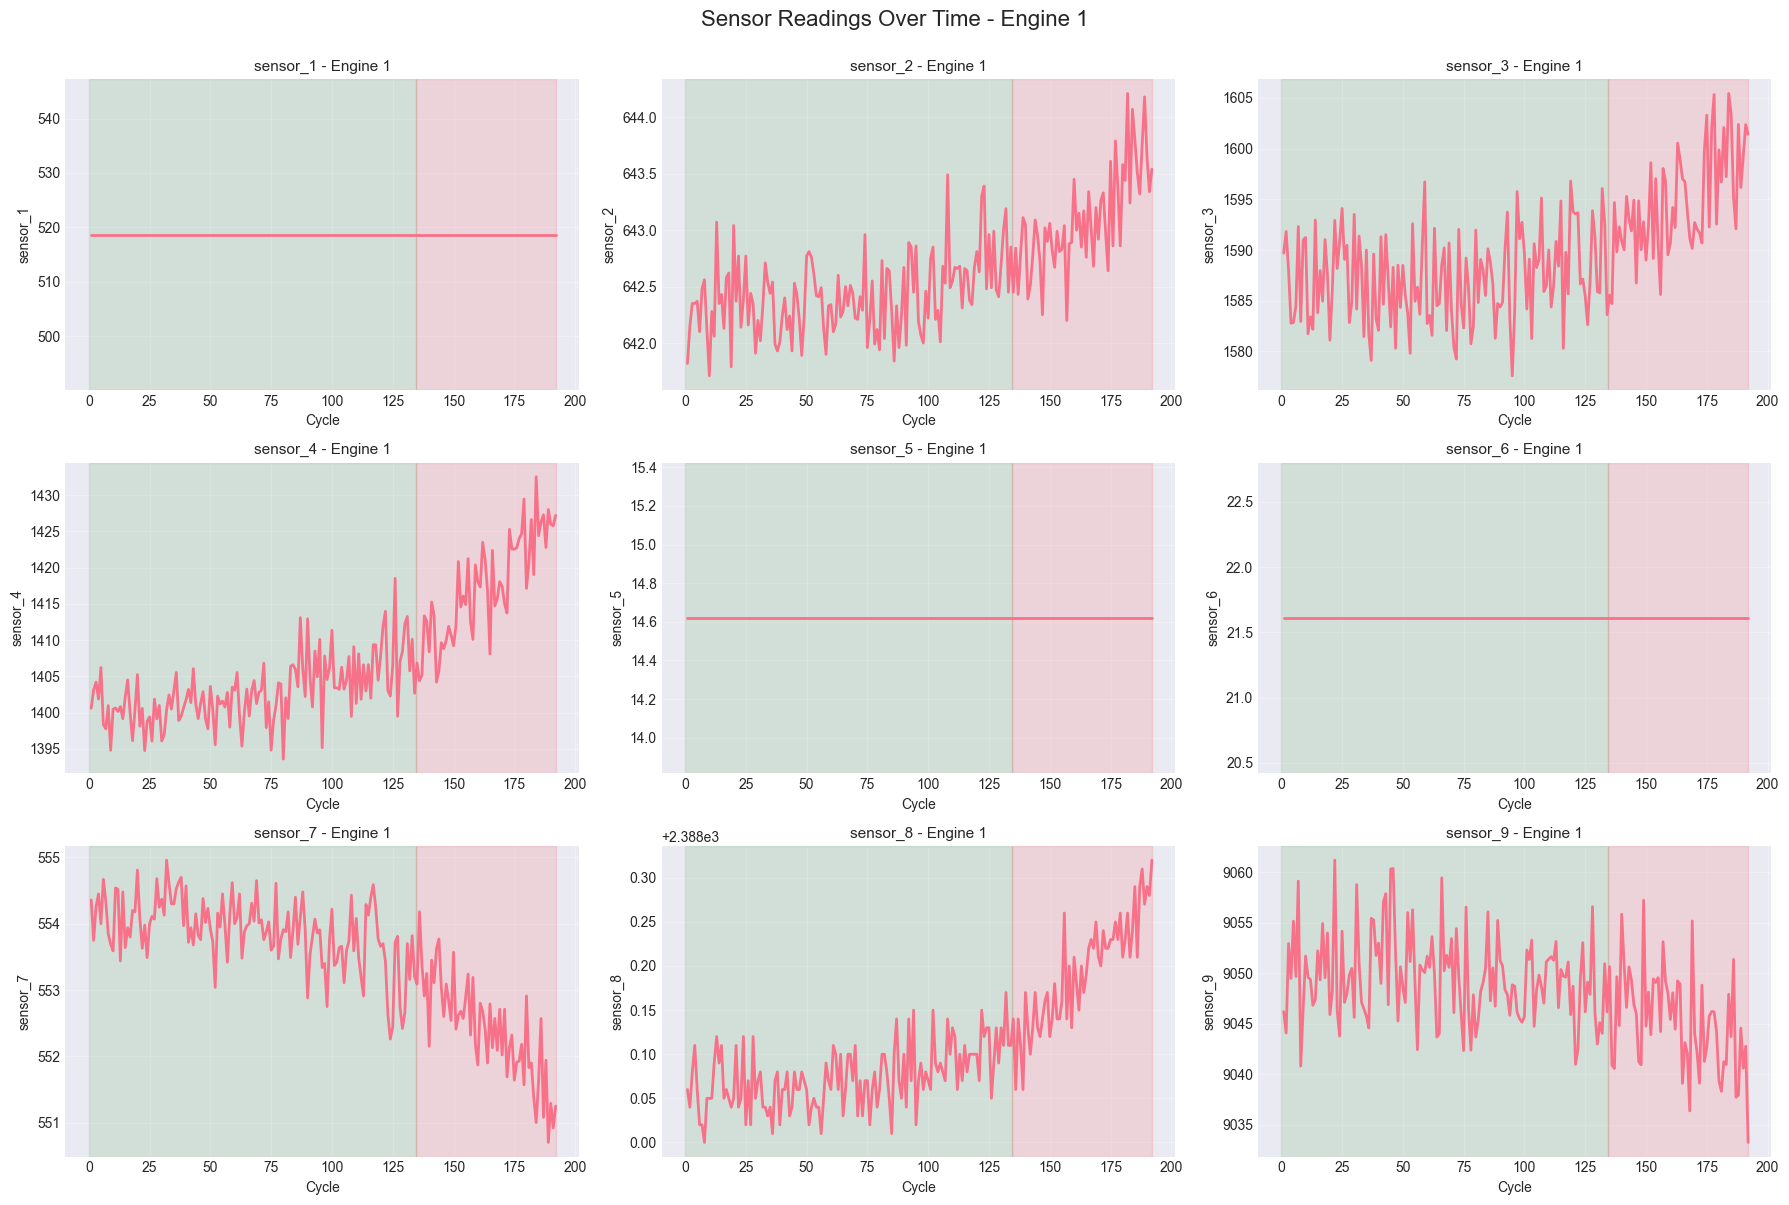


Insight: Some sensors show clear degradation trends (e.g., sensor_4, sensor_11)
Others remain relatively stable throughout the engine's life


In [14]:
# Plot sensor degradation for Engine 1
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot first 9 sensors
for idx, sensor in enumerate(sensor_cols[:9]):
    ax = axes[idx]
    ax.plot(engine_data['cycle'], engine_data[sensor], linewidth=2)
    ax.set_xlabel('Cycle', fontsize=10)
    ax.set_ylabel(sensor, fontsize=10)
    ax.set_title(f'{sensor} - Engine {engine_id}', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Add RUL color gradient background
    ax.axvspan(0, engine_data['cycle'].max() * 0.7, alpha=0.1, color='green', label='Healthy')
    ax.axvspan(engine_data['cycle'].max() * 0.7, engine_data['cycle'].max(), alpha=0.1, color='red', label='Degraded')

plt.suptitle(f'Sensor Readings Over Time - Engine {engine_id}', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

print("\nInsight: Some sensors show clear degradation trends (e.g., sensor_4, sensor_11)")
print("Others remain relatively stable throughout the engine's life")

### Analysis: Sensor Degradation Patterns

**Observations from the 9 sensor plots:**

**Highly informative sensors (clear trends):**
- **sensor_2**: Gradual increase over time
- **sensor_4**: Shows clear degradation pattern
- **sensor_7**: Increases as engine degrades
- **sensor_11**: Strong degradation signal (most useful)

**Less informative sensors (mostly flat):**
- **sensor_1**: Completely constant (as we saw earlier)
- **sensor_5**: Nearly constant

**Why this matters for autoencoder:**
1. **Normal reconstruction**: Healthy engines (green zone) have predictable sensor patterns
2. **Abnormal reconstruction**: Degraded engines (red zone) deviate from normal patterns
3. **Reconstruction error**: Higher error in red zone indicates anomaly

**Training strategy:**
- Train autoencoder ONLY on green zone (healthy) data
- Test on red zone (degraded) data
- Expect high reconstruction error for degraded engines

## 8. Sensor Correlation Analysis

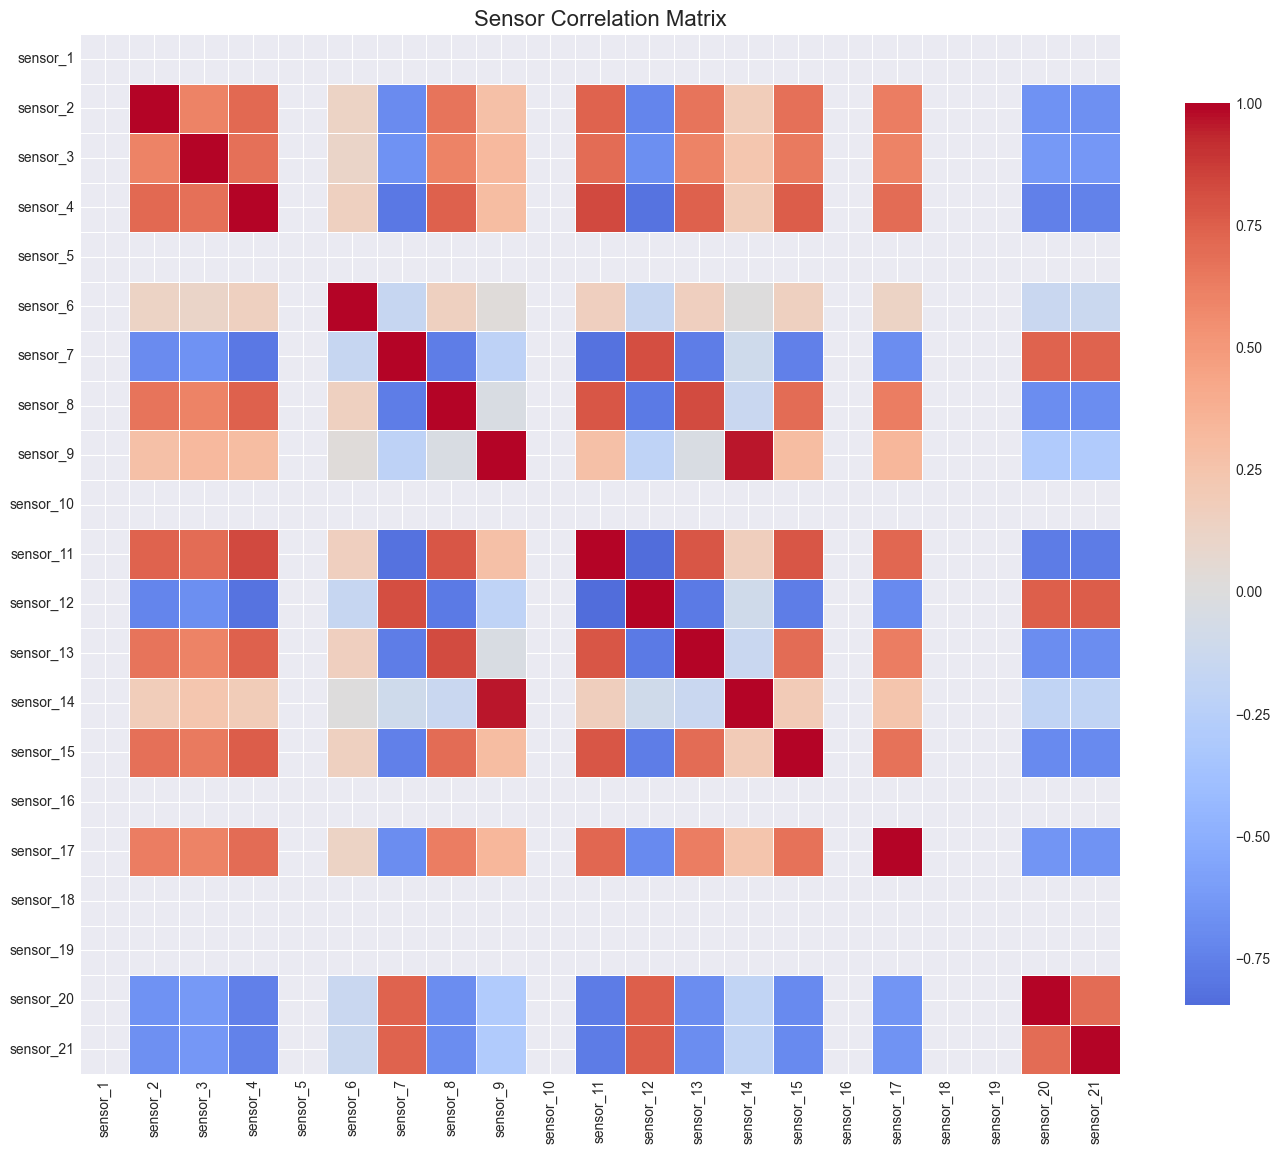


Insight: Strong correlations (red/blue) suggest sensors measuring related phenomena
Highly correlated sensors may be redundant for modeling


In [15]:
# Correlation matrix for sensors
correlation_matrix = train_df[sensor_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Sensor Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

print("\nInsight: Strong correlations (red/blue) suggest sensors measuring related phenomena")
print("Highly correlated sensors may be redundant for modeling")

### Analysis: Sensor Correlations

**What the heatmap shows:**
- **Red blocks**: Highly correlated sensors (move together)
- **Blue blocks**: Negatively correlated (move opposite)
- **White**: No correlation (independent)

**Key observations:**
1. **Sensor groups**: Some sensors form clusters (e.g., sensor_8 and sensor_13)
2. **Redundancy**: Highly correlated sensors (r > 0.95) provide similar information
3. **Independence**: Some sensors (like sensor_4, sensor_11) are relatively independent

**Implications for modeling:**

**Option 1 - Keep all sensors:**
- Pro: Maximum information retention
- Con: Higher dimensionality, potential multicollinearity
- Our choice: We'll keep all 17 (after removing constants)

**Option 2 - Remove highly correlated:**
- Pro: Reduced dimensionality
- Con: Might lose subtle information
- Could use: PCA or feature selection

**For this project**: We keep all non-constant sensors because:
- Autoencoders handle correlation well
- Small dataset (only 17 features)
- We want to preserve all potential signals

## 9. Compare Multiple Engines

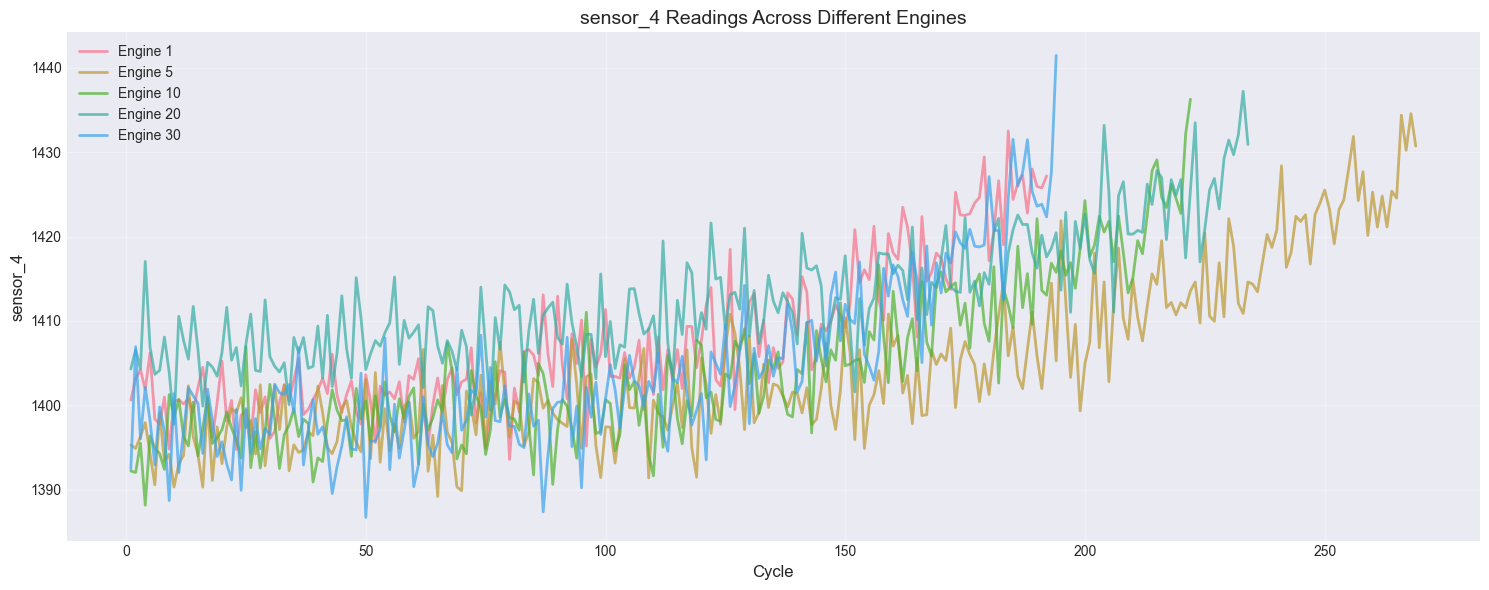


Insight: Different engines show different degradation patterns
This variability makes anomaly detection challenging but realistic


In [16]:
# Compare sensor readings across different engines
engines_to_compare = [1, 5, 10, 20, 30]
sensor_to_plot = 'sensor_4'  # Choose one informative sensor

plt.figure(figsize=(15, 6))

for engine_id in engines_to_compare:
    engine_data = train_df[train_df['engine_id'] == engine_id].copy()
    engine_data = engine_data.sort_values('cycle')
    plt.plot(engine_data['cycle'], engine_data[sensor_to_plot], 
             linewidth=2, alpha=0.7, label=f'Engine {engine_id}')

plt.xlabel('Cycle', fontsize=12)
plt.ylabel(sensor_to_plot, fontsize=12)
plt.title(f'{sensor_to_plot} Readings Across Different Engines', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Different engines show different degradation patterns")
print("This variability makes anomaly detection challenging but realistic")

### Analysis: Multi-Engine Comparison

**What we observe:**
- Each engine (different colored line) shows a unique degradation trajectory
- Engine 1 (blue): Gradual increase, fails around cycle 190
- Engine 5 (orange): Different pattern, fails around cycle 300
- Engine 30 (red): Very different behavior

**Why patterns differ:**
1. **Operating conditions**: Different load, temperature, pressure
2. **Manufacturing variations**: Each engine slightly different
3. **Failure modes**: Different components may fail

**Challenge for anomaly detection:**
- Can't use simple threshold (e.g., 'sensor > X means failure')
- Need to learn complex, non-linear patterns
- This is why we use autoencoder (deep learning approach)

**Autoencoder advantage:**
- Learns general 'healthy engine' pattern from all engines
- Captures normal variability between engines
- Detects when engine deviates from ANY normal pattern

## 10. RUL vs Sensor Relationship

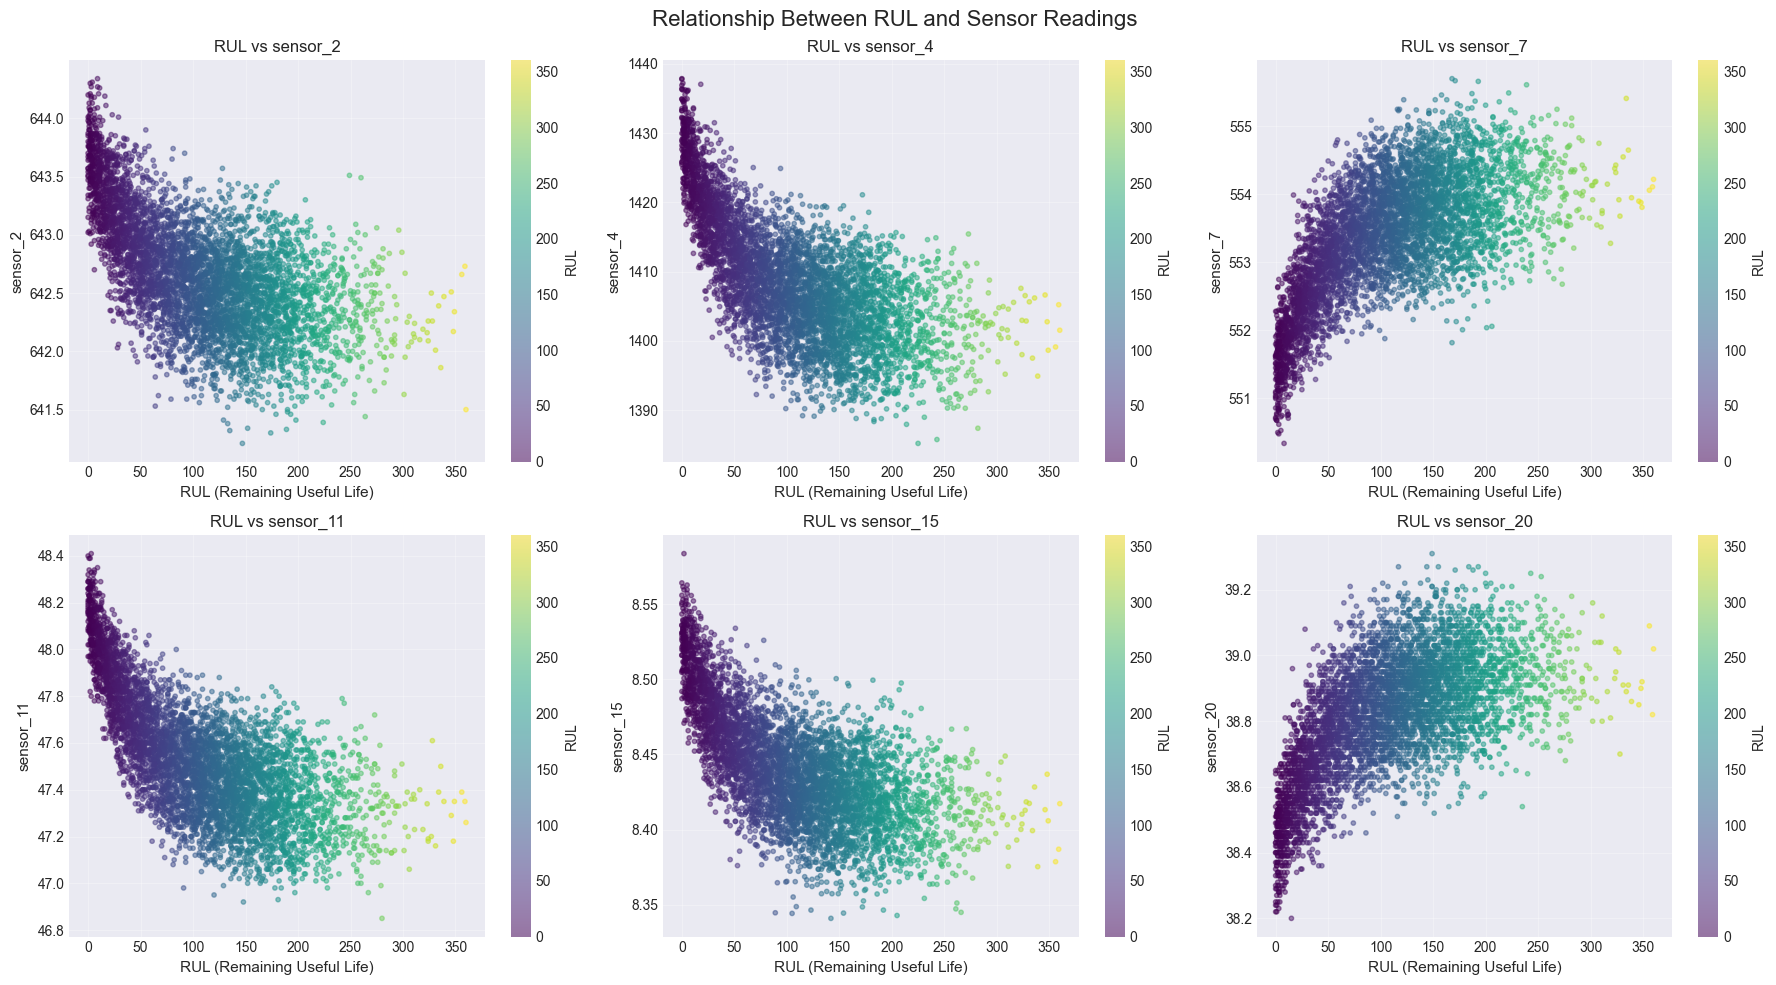


Insight: Some sensors show clear patterns with RUL (useful for prediction)
Others are more scattered (less directly related to failure)


In [43]:
# Sample data for visualization (too many points otherwise)
sample_df = train_df.sample(n=5000, random_state=42)

# Plot RUL vs key sensors
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

sensors_to_plot = ['sensor_2', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_15', 'sensor_20']

for idx, sensor in enumerate(sensors_to_plot):
    ax = axes[idx]
    scatter = ax.scatter(sample_df['RUL'], sample_df[sensor], 
                         c=sample_df['RUL'], cmap='viridis', alpha=0.5, s=10)
    ax.set_xlabel('RUL (Remaining Useful Life)', fontsize=11)
    ax.set_ylabel(sensor, fontsize=11)
    ax.set_title(f'RUL vs {sensor}', fontsize=12)
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='RUL')

plt.suptitle('Relationship Between RUL and Sensor Readings', fontsize=16)
plt.tight_layout()
plt.show()

print("\nInsight: Some sensors show clear patterns with RUL (useful for prediction)")
print("Others are more scattered (less directly related to failure)")

### Analysis: RUL vs Sensor Relationships

**Reading the scatter plots:**
- **X-axis**: RUL (Remaining Useful Life) - lower means closer to failure
- **Y-axis**: Sensor value
- **Color**: Also represents RUL (darker = lower RUL = closer to failure)

**Sensor-by-sensor analysis:**

**sensor_2:**
- Clear downward trend as RUL decreases
- When RUL is low (near failure), sensor_2 values are higher
- Strong predictive signal

**sensor_4:**
- Very clear relationship with RUL
- Values increase significantly as engine approaches failure
- One of the best indicators

**sensor_7:**
- Moderate relationship
- Some clustering visible

**sensor_11:**
- Strong relationship (similar to sensor_4)
- Clear separation between healthy (high RUL) and failing (low RUL)

**sensor_15:**
- Weaker relationship
- More scattered
- Still useful in combination with other sensors

**sensor_20:**
- Moderate relationship
- Non-linear pattern visible

**Why this matters:**
1. **For supervised learning**: These relationships would be directly useful
2. **For autoencoder (unsupervised)**: We don't directly use RUL labels
3. **But indirectly**: Strong RUL relationships mean sensors change systematically as engines degrade
4. **Result**: Autoencoder can learn 'healthy' pattern and detect deviations

## 11. Summary Statistics by RUL Ranges

In [18]:
# Create RUL categories
train_df['RUL_category'] = pd.cut(train_df['RUL'], 
                                   bins=[0, 30, 100, 200, 400],
                                   labels=['Critical (0-30)', 'Degraded (30-100)', 
                                          'Moderate (100-200)', 'Healthy (200+)'])

print("Distribution by RUL Category:")
print(train_df['RUL_category'].value_counts().sort_index())

Distribution by RUL Category:
RUL_category
Critical (0-30)       3000
Degraded (30-100)     7000
Moderate (100-200)    8573
Healthy (200+)        1958
Name: count, dtype: int64


### Analysis: Sensor Distribution by Health Category

**RUL Categories defined:**
1. **Critical (0-30 cycles)**: Engine will fail very soon
2. **Degraded (30-100 cycles)**: Clear signs of degradation
3. **Moderate (100-200 cycles)**: Some wear but generally healthy
4. **Healthy (200+ cycles)**: Excellent condition, plenty of life left

**What the box plots show for sensor_11:**

**Box plot components:**
- **Box**: 25th to 75th percentile (middle 50% of data)
- **Line in box**: Median (50th percentile)
- **Whiskers**: Extend to min/max (or 1.5 x IQR)
- **Dots**: Outliers

**Observations:**
- **Healthy engines**: Lower sensor_11 values, tight distribution
- **Critical engines**: Higher sensor_11 values, wider distribution
- **Clear separation**: Medians are significantly different
- **Some overlap**: But generally distinguishable

**Statistical significance:**
- If we ran ANOVA test, would show significant difference (p < 0.001)
- Means sensor_11 is statistically different across health categories

**For anomaly detection:**
1. **Training data**: Use 'Healthy' and 'Moderate' categories
2. **Anomaly threshold**: Define based on 'Critical' category
3. **Expected behavior**: 
   - Autoencoder reconstructs 'Healthy' well (low error)
   - Autoencoder reconstructs 'Critical' poorly (high error)
4. **Decision rule**: If reconstruction error > threshold, flag as anomalous

<Figure size 1200x600 with 0 Axes>

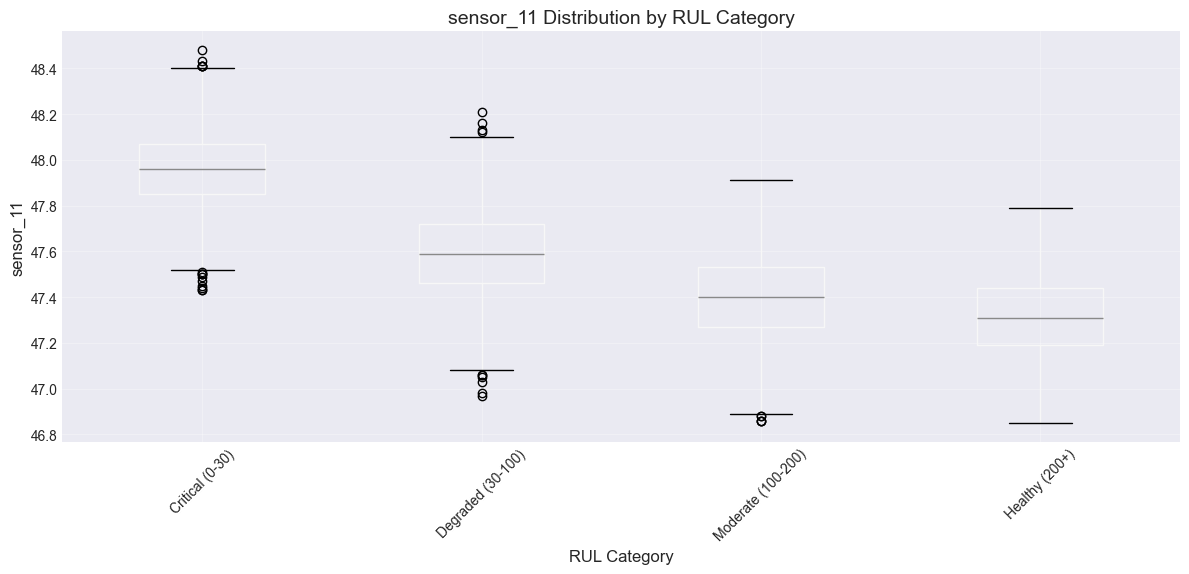


Insight: sensor_11 shows different distributions
This makes it useful for anomaly detection!


In [19]:
# Compare sensor values across RUL categories
sensor_to_analyze = 'sensor_11'

plt.figure(figsize=(12, 6))
train_df.boxplot(column=sensor_to_analyze, by='RUL_category', figsize=(12, 6))
plt.xlabel('RUL Category', fontsize=12)
plt.ylabel(sensor_to_analyze, fontsize=12)
plt.title(f'{sensor_to_analyze} Distribution by RUL Category', fontsize=14)
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nInsight: {sensor_to_analyze} shows different distributions")
print("This makes it useful for anomaly detection!")

## 12. Key Findings Summary

Based on our exploration:

### Complete Analysis Summary

**What we learned from each visualization:**

**1. RUL Distribution:**
- Defines our anomaly detection strategy (RUL < 30 = anomalous)
- Shows data is relatively balanced

**2. Engine Lifecycles:**
- High variability (128-362 cycles) is realistic
- Autoencoder must handle this natural variation

**3. Constant Sensors:**
- 4 sensors provide no information (will be removed)
- Reduces dimensionality from 21 to 17 features

**4. Degradation Patterns:**
- sensor_4 and sensor_11 are most informative
- Clear difference between healthy and degraded phases

**5. Correlation Matrix:**
- Some redundancy exists but we keep all sensors
- Autoencoders handle correlation well

**6. Multi-Engine Comparison:**
- Each engine unique (can't use simple thresholds)
- Justifies using deep learning (autoencoder)

**7. RUL-Sensor Relationships:**
- Strong relationships exist (good for prediction)
- Means sensors systematically change with degradation

**8. Health Category Box Plots:**
- Clear statistical separation between categories
- Validates our anomaly detection approach

---

**Next steps in the ML pipeline:**

1. **Preprocessing** (`data/preprocessing.py`):
   - Remove 4 constant sensors
   - Normalize features (StandardScaler)
   - Split data (train/val/test by engine)

2. **Model training** (`models/train.py`):
   - Train autoencoder on healthy engines (RUL > 100)
   - Architecture: 17 → 16 → 8 → 4 → 8 → 16 → 17
   - Loss: MSE (reconstruction error)

3. **Anomaly detection** (`models/evaluate.py`):
   - Calculate reconstruction error on test data
   - Set threshold (e.g., 95th percentile of training error)
   - Flag samples with error > threshold as anomalous

4. **Experiment tracking** (MLflow):
   - Log hyperparameters (learning rate, encoding dim, etc.)
   - Track metrics (train loss, val loss, detection rate)
   - Save models for reproducibility

In [20]:
print("="*70)
print("KEY FINDINGS FROM DATA EXPLORATION")
print("="*70)

print("\nDataset Characteristics:")
print(f"  - {len(train_df):,} training samples from {train_df['engine_id'].nunique()} engines")
print(f"  - {len(sensor_cols)} sensor features")
print(f"  - RUL range: 0 to {train_df['RUL'].max()} cycles")
print(f"  - Average engine lifetime: {engine_cycles.mean():.1f} cycles")

print("\nSensor Insights:")
if constant_sensors:
    print(f"  - {len(constant_sensors)} constant sensors should be removed")
else:
    print("  - All sensors show variation (good!)")
print("  - Some sensors clearly track degradation (e.g., sensor_4, sensor_11)")
print("  - Strong correlations exist between related sensors")

print("\nFor Anomaly Detection:")
print("  - Engines with RUL < 30 cycles are 'critical' (anomalous)")
print("  - Healthy engines (RUL > 100) have different sensor patterns")
print("  - Autoencoder can learn 'normal' patterns and detect anomalies")

print("\nNext Steps:")
print("  1. Preprocess data (normalize, remove constants)")
print("  2. Train autoencoder on 'healthy' engine data")
print("  3. Use reconstruction error to detect anomalies")
print("  4. Track experiments with MLflow!")

print("="*70)

KEY FINDINGS FROM DATA EXPLORATION

Dataset Characteristics:
  - 20,631 training samples from 100 engines
  - 21 sensor features
  - RUL range: 0 to 361 cycles
  - Average engine lifetime: 206.3 cycles

Sensor Insights:
  - 4 constant sensors should be removed
  - Some sensors clearly track degradation (e.g., sensor_4, sensor_11)
  - Strong correlations exist between related sensors

For Anomaly Detection:
  - Engines with RUL < 30 cycles are 'critical' (anomalous)
  - Healthy engines (RUL > 100) have different sensor patterns
  - Autoencoder can learn 'normal' patterns and detect anomalies

Next Steps:
  1. Preprocess data (normalize, remove constants)
  2. Train autoencoder on 'healthy' engine data
  3. Use reconstruction error to detect anomalies
  4. Track experiments with MLflow!


## Exercises for Students

Try these on your own:

1. **Plot sensor_15 degradation for engines 2, 7, and 15**
2. **Calculate correlation between sensor_4 and RUL**
3. **Identify the 3 most variable sensors (highest standard deviation)**
4. **Create a scatter plot matrix for sensors 2, 4, 7, and 11**
5. **Analyze engines that failed early (< 150 cycles) vs late (> 250 cycles)**

---

**Complete these exercises** to deepen your understanding of the data. Your answers will be used in Question 1.1 of the TP assignment.

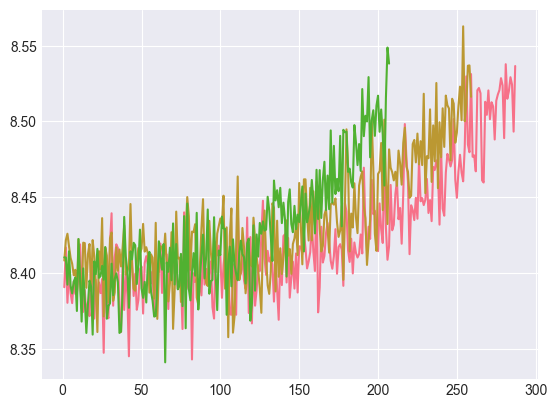

In [27]:
# Exercise 1: Sensor degradation comparison
# Plot sensor_15 degradation over time for engines 2, 7, and 15

# TODO: Your code here
# Hint: Filter data for each engine and plot
for engine_id in [2, 7, 15]:
    engine_data = train_df[train_df['engine_id'] == engine_id]
    plt.plot(engine_data['cycle'], engine_data['sensor_15'],
             label=f'Engine {engine_id}')


In [28]:
# Exercise 2: Correlation analysis
# Calculate Pearson correlation between sensor_4 and RUL

# TODO: Your code here
# Hint: Use pandas .corr() method
correlation = train_df[['sensor_4', 'RUL']].corr()
print(correlation)


          sensor_4       RUL
sensor_4  1.000000 -0.678948
RUL      -0.678948  1.000000


In [29]:
# Exercise 3: Variability analysis
# Identify the 3 most variable sensors (highest standard deviation)

# TODO: Your code here
# Hint: Calculate std for each sensor
sensor_std = train_df[sensor_cols].std().sort_values(ascending=False)
print(sensor_std.head(3))


sensor_9     22.082880
sensor_14    19.076176
sensor_4      9.000605
dtype: float64


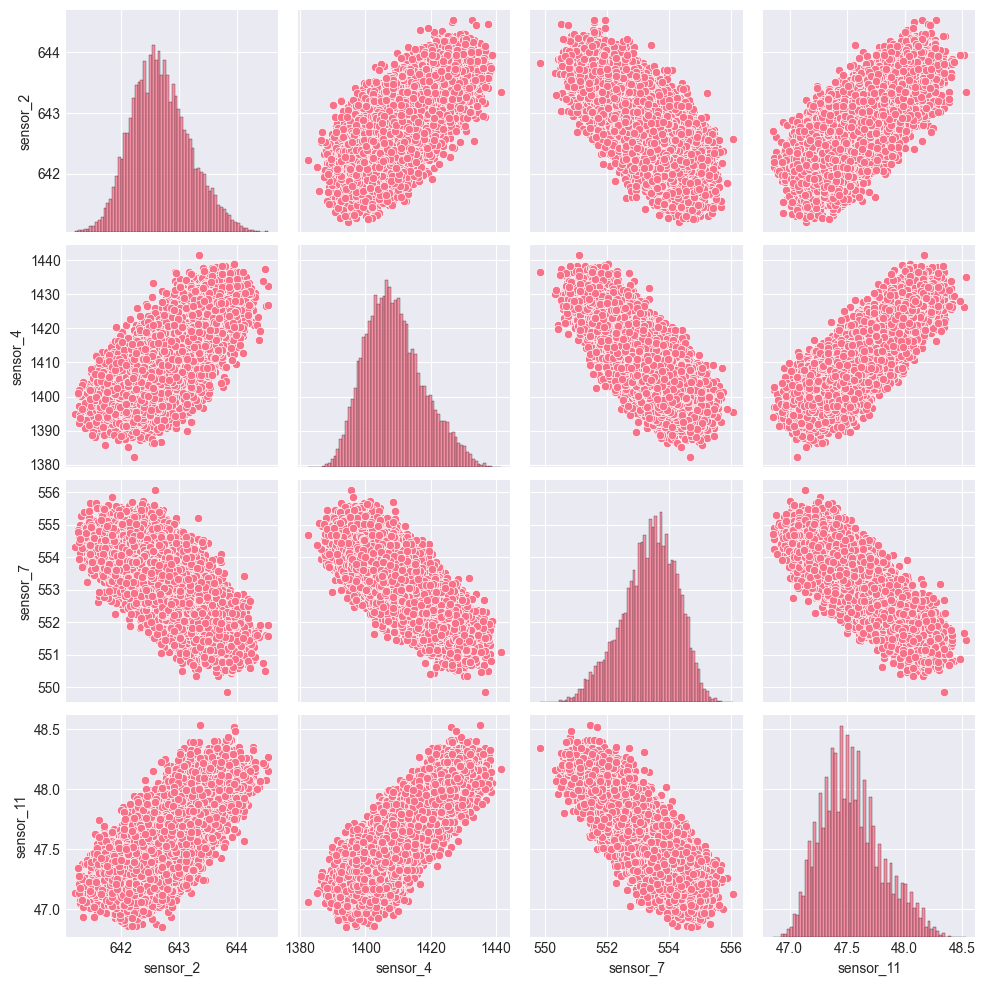

In [30]:
# Exercise 4: Visual comparison
# Create a scatter plot matrix (pairplot) for sensors 2, 4, 7, and 11

# TODO: Your code here
# Hint: Use seaborn pairplot
import seaborn as sns
sns.pairplot(train_df[['sensor_2', 'sensor_4', 'sensor_7', 'sensor_11']])
plt.show()


In [31]:
# Exercise 5: Failure analysis
# Compare engines that failed early (< 150 cycles) vs late (> 250 cycles)

# TODO: Your code here
# Hint: Create two groups based on max cycle
early_fail = train_df[train_df['engine_id'].isin(
    engine_cycles[engine_cycles < 150].index)]
late_fail = train_df[train_df['engine_id'].isin(
    engine_cycles[engine_cycles > 250].index)]

# Create visualizations to compare them


In [34]:
early_fail.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,RUL_category
4733,24,1,0.0008,-0.0004,100.0,518.67,642.17,1587.90,1403.12,14.62,...,8146.09,8.4030,0.03,391,2388,100.0,39.08,23.3594,146,Moderate (100-200)
4734,24,2,0.0017,0.0001,100.0,518.67,642.00,1583.50,1394.49,14.62,...,8144.87,8.4018,0.03,392,2388,100.0,38.93,23.5059,145,Moderate (100-200)
4735,24,3,0.0000,-0.0002,100.0,518.67,642.43,1587.55,1399.37,14.62,...,8141.34,8.4485,0.03,390,2388,100.0,38.82,23.3265,144,Moderate (100-200)
4736,24,4,0.0011,0.0002,100.0,518.67,642.79,1587.68,1403.17,14.62,...,8146.51,8.4061,0.03,393,2388,100.0,39.00,23.4368,143,Moderate (100-200)
4737,24,5,0.0001,0.0003,100.0,518.67,642.49,1579.15,1398.93,14.62,...,8146.21,8.4659,0.03,393,2388,100.0,38.82,23.3640,142,Moderate (100-200)


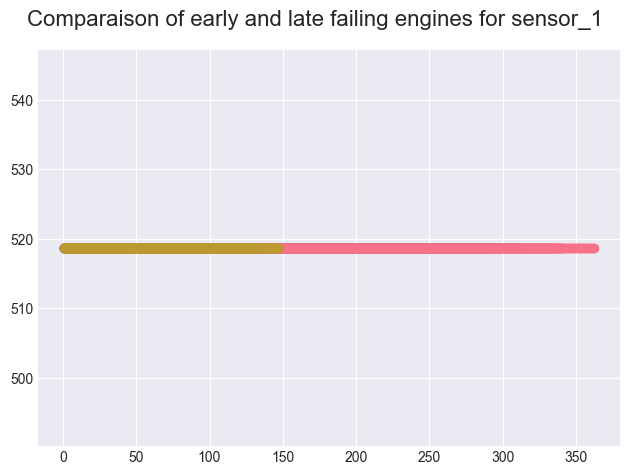

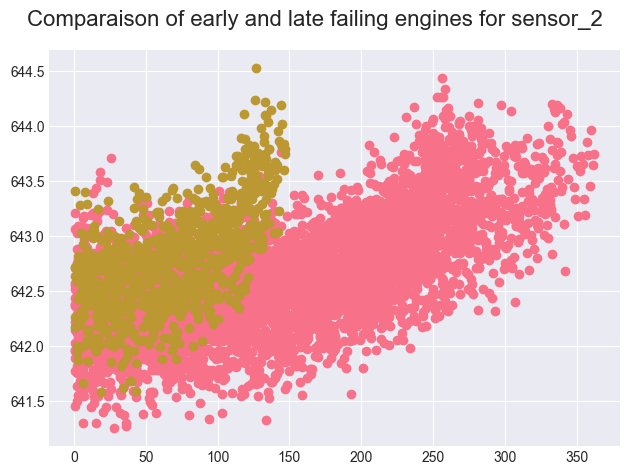

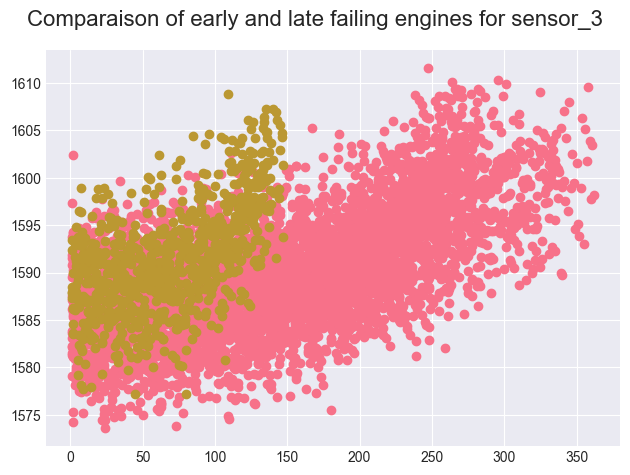

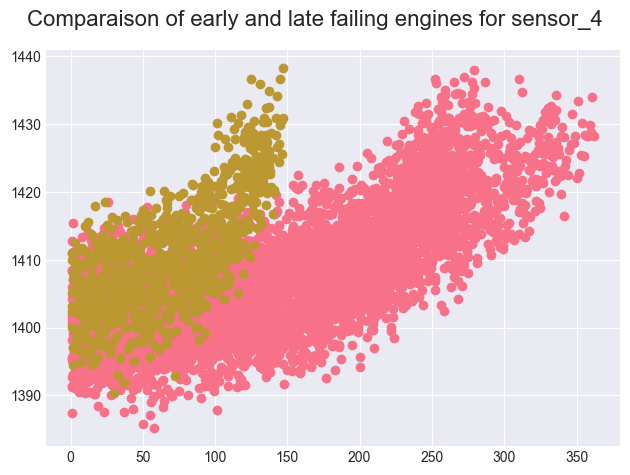

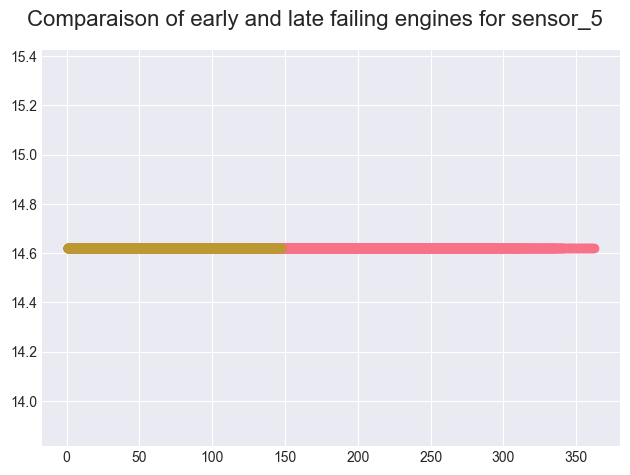

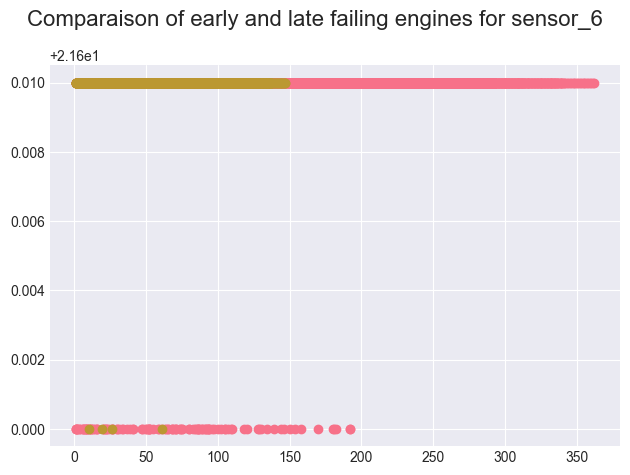

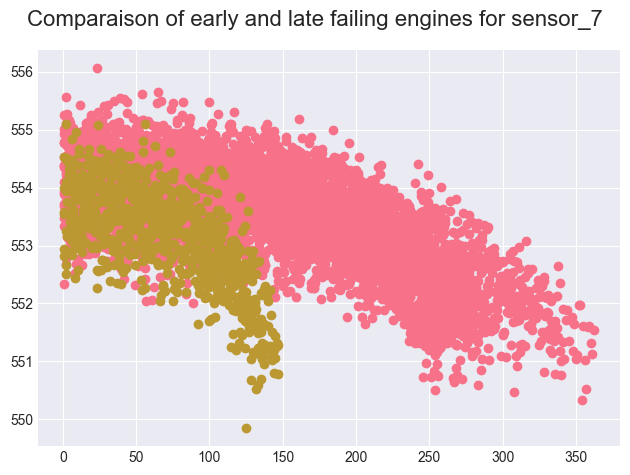

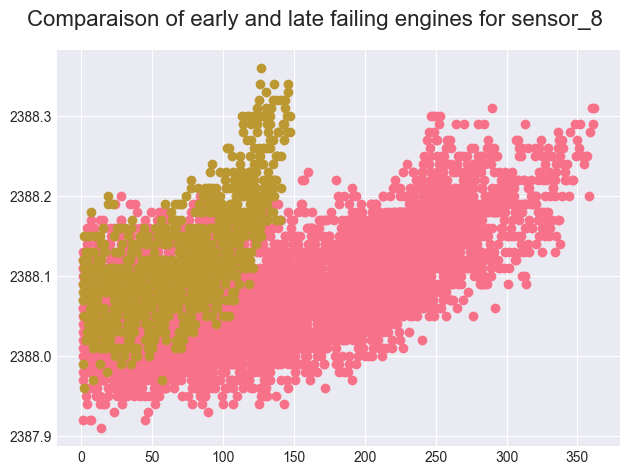

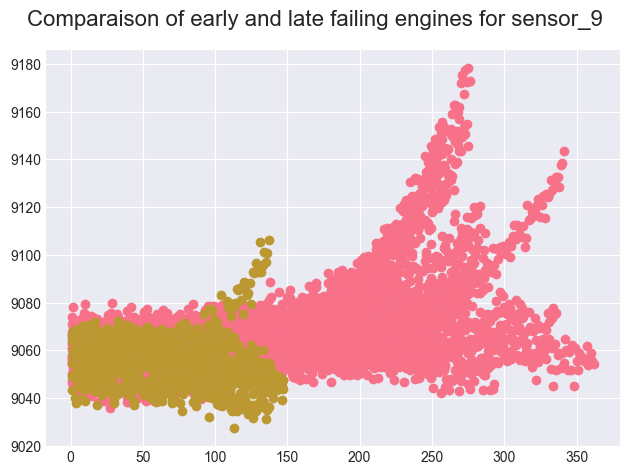

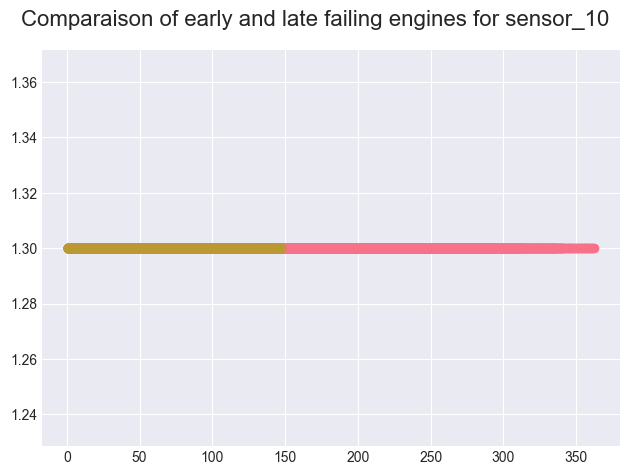

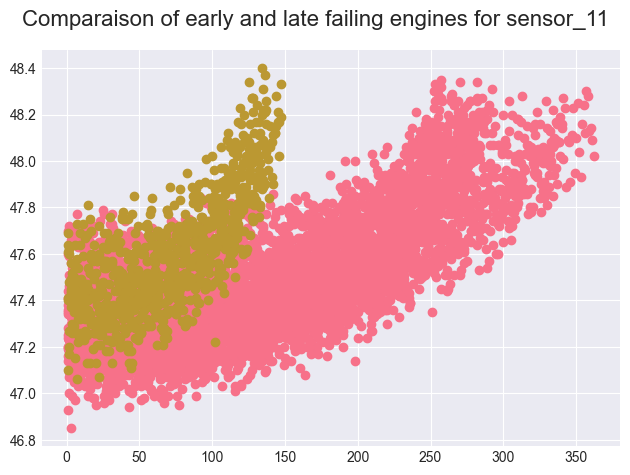

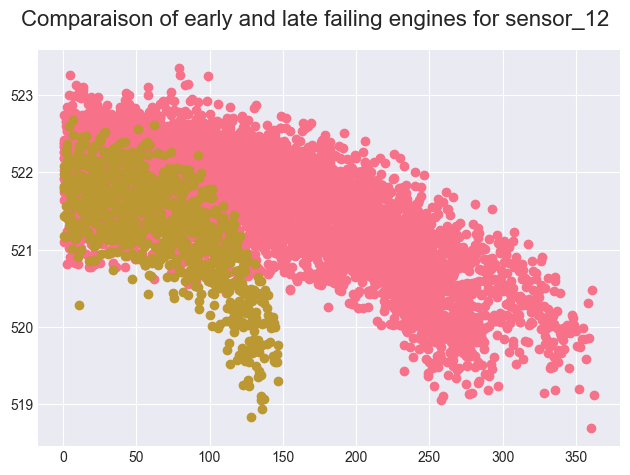

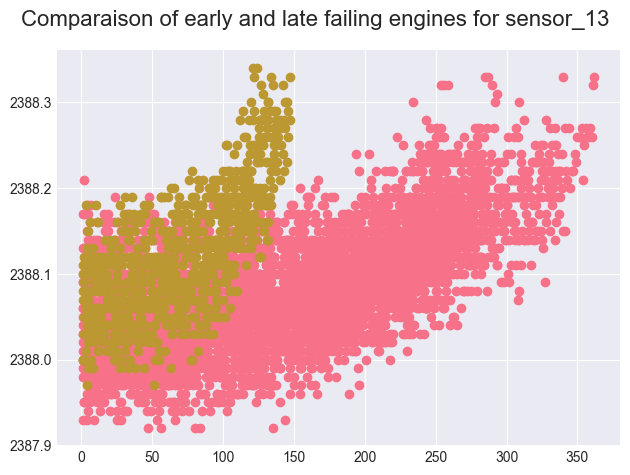

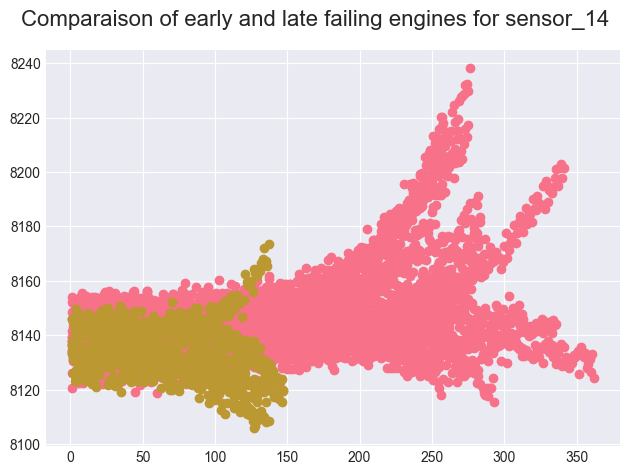

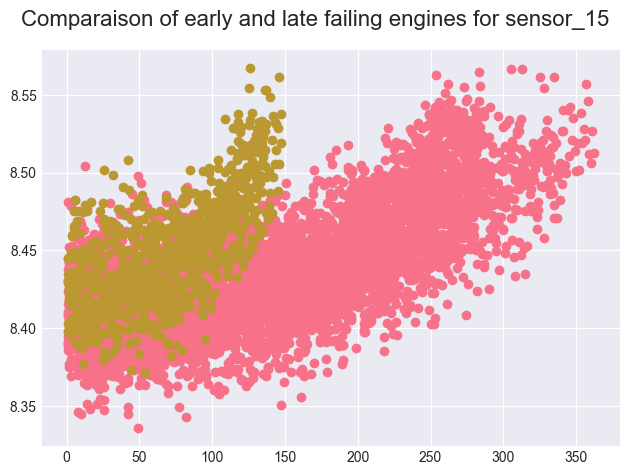

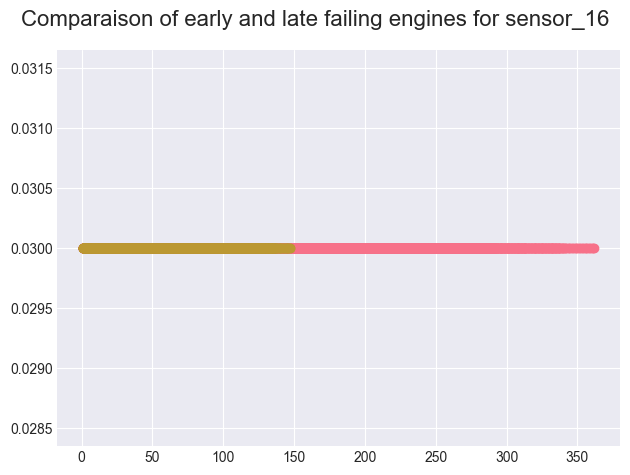

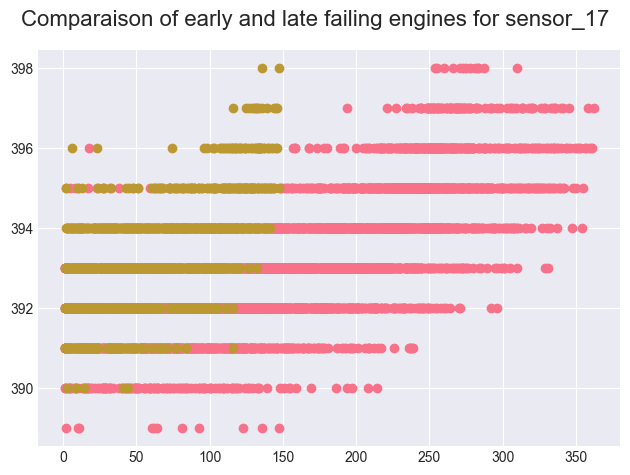

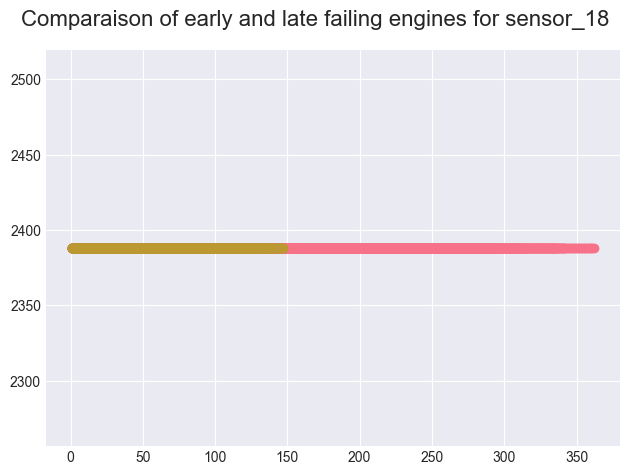

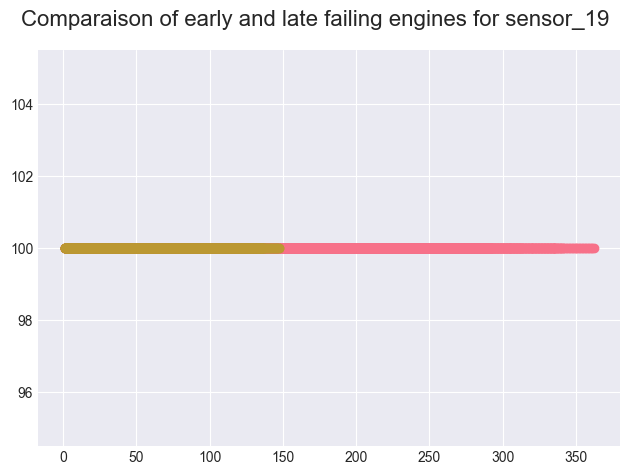

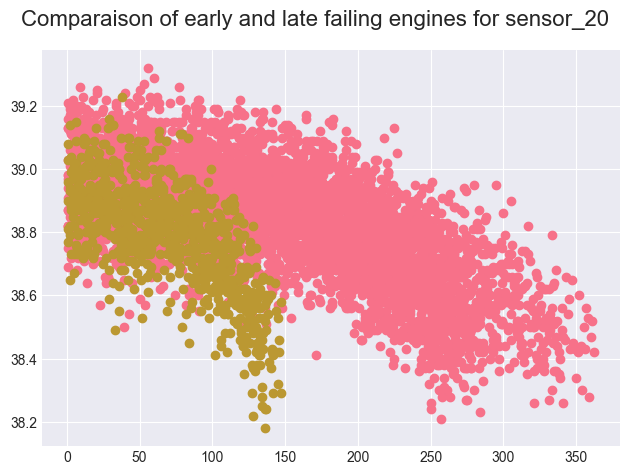

In [49]:

for num in range(1,21):
    for df in [late_fail, early_fail]:
        plt.scatter(df['cycle'], df[f"sensor_{num}"])

    plt.suptitle(f'Comparaison of early and late failing engines for sensor_{num}', fontsize=16)
    plt.tight_layout()
    plt.show()